# Задание 2.4

## Практика

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [3]:
boston = pd.read_csv('files/boston.csv')[['LSTAT', 'MEDV']]
boston.shape

(506, 2)

array([[<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

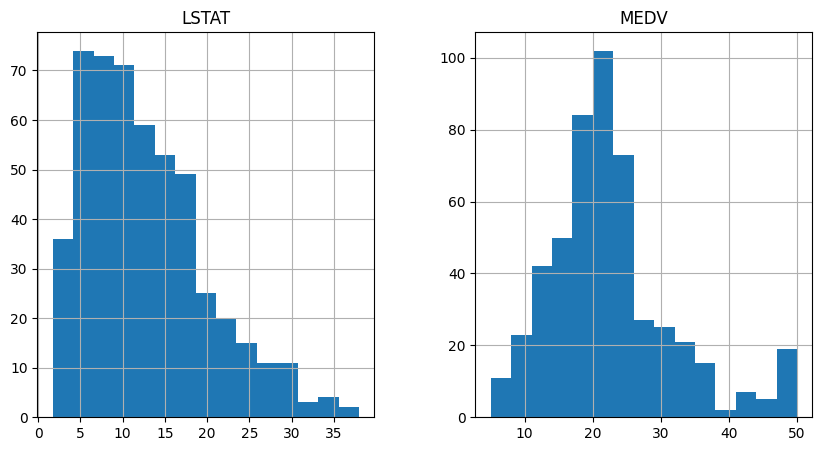

In [4]:
boston.hist(bins = 15, figsize = (10, 5))

In [5]:
boston.describe()

,LSTAT,MEDV
count,506.000000,506.000000
mean,12.653063,22.532806
std,7.141062,9.197104
min,1.730000,5.000000
25%,6.950000,17.025000
50%,11.360000,21.200000
75%,16.955000,25.000000
max,37.970000,50.000000


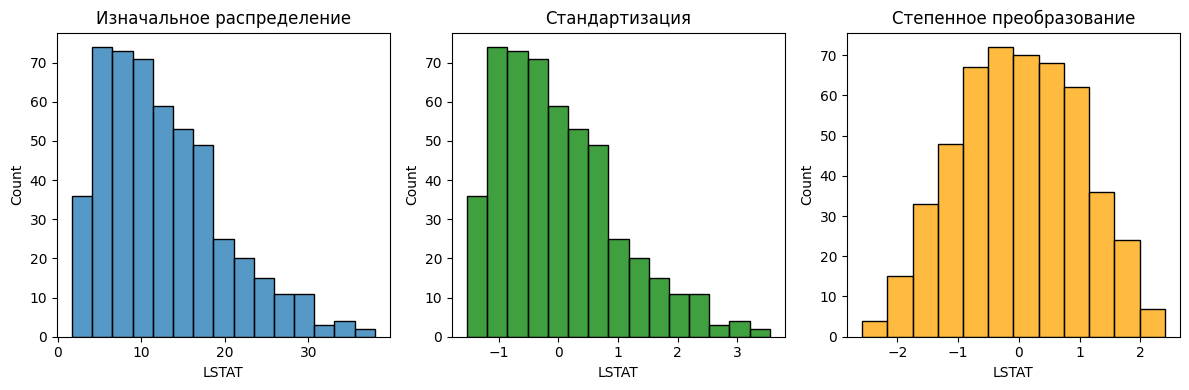

In [6]:
# создадим сетку подграфиков 1 x 3
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))

# на первом графике разместим изначальное распределение
sns.histplot(data = boston, x = 'LSTAT',
						bins = 15,
						ax = ax[0])
ax[0].set_title('Изначальное распределение')

# на втором - данные после стандартизации
sns.histplot(x = (boston.LSTAT - np.mean(boston.LSTAT)) / np.std(boston.LSTAT),
							bins = 15, color = 'green',
							ax = ax[1])
ax[1].set_title('Стандартизация')

# наконец скачаем функцию степенного преобразования power_transform()
from sklearn.preprocessing import power_transform

# и на третьем графике покажем преобразование Бокса-Кокса
sns.histplot(x = power_transform(boston[['LSTAT']],
																	method = 'box-cox').flatten(),
																	bins = 12, color = 'orange',
																	ax = ax[2])
ax[2].set(title = 'Степенное преобразование', xlabel = 'LSTAT')

plt.tight_layout()
plt.show()

In [7]:
# сделаем копию датафрейма
boston_outlier = boston.copy()
# создадим два отличающихся наблюдения
outliers = [pd.Series([45, 70], index = boston_outlier.columns), pd.Series([50, 72], index = boston_outlier.columns)]
# добавим их в датафрейм
boston_outlier = pd.concat([boston_outlier, pd.DataFrame(outliers)], ignore_index=True)
# посмотрим на размерность нового датафрейма
boston_outlier.shape

(508, 2)

In [8]:
boston_outlier.tail()

,LSTAT,MEDV
503,5.64,23.9
504,6.48,22.0
505,7.88,11.9
506,45.00,70.0
507,50.00,72.0


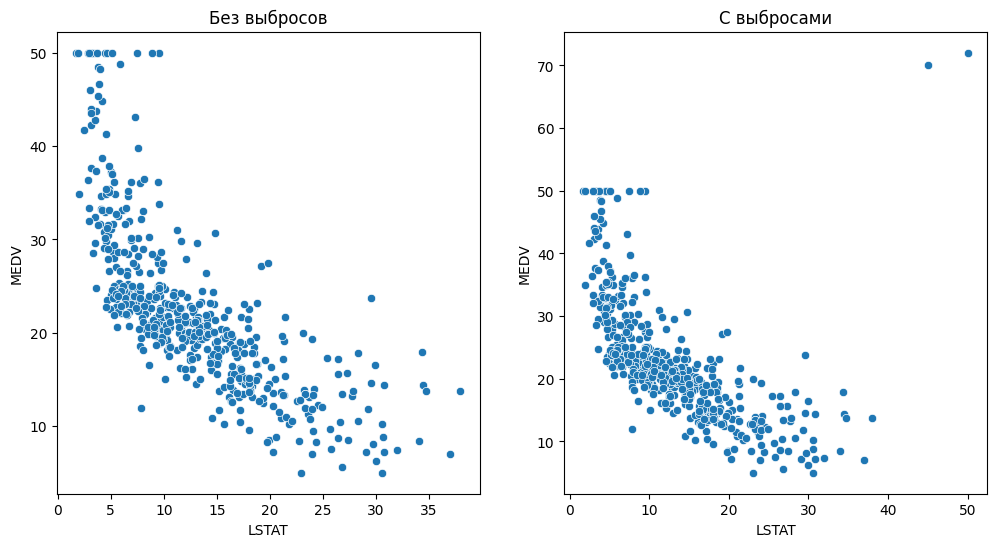

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
sns.scatterplot(data = boston, x = 'LSTAT', y = 'MEDV', ax = ax[0]).set(title = 'Без выбросов')
sns.scatterplot(data = boston_outlier, x = 'LSTAT', y = 'MEDV', ax = ax[1]).set(title = 'С выбросами');


In [10]:
((boston - np.mean(boston, axis=0)) / np.std(boston, axis=0)).head(3)

,LSTAT,MEDV
0,-1.075562,0.159686
1,-0.492439,-0.101524
2,-1.208727,1.324247


In [11]:
# из модуля preprocessing импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler и применим метод .fit()
st_scaler = StandardScaler().fit(boston)
st_scaler

,copy,True
,with_mean,True
,with_std,True


In [ ]:
# выведем среднее арифметическое
st_scaler.mean_

array([12.65306324, 22.53280632])

In [13]:
# и СКО каждого из столбцов
st_scaler.scale_

array([7.13400164, 9.18801155])

In [15]:
# метод .transform() возвращает массив Numpy с преобразованными значениями
boston_scaled = st_scaler.transform(boston)

In [16]:
# превратим массив в датафрейм с помощью функции pd.DataFrame()
pd.DataFrame(boston_scaled, columns = boston.columns).head(3)

,LSTAT,MEDV
0,-1.075562,0.159686
1,-0.492439,-0.101524
2,-1.208727,1.324247


In [17]:
boston_scaled = pd.DataFrame(StandardScaler().fit_transform(boston), columns = boston.columns)
# аналогичным образом стандиртизируем данные с выбросами
boston_outlier_scaled = pd.DataFrame(StandardScaler().fit_transform(boston_outlier),columns = boston_outlier.columns)
boston_outlier_scaled.head()

,LSTAT,MEDV
0,-1.048568,0.132139
1,-0.490066,-0.116325
2,-1.176110,1.239874
3,-1.322448,1.105290
4,-1.001578,1.395164


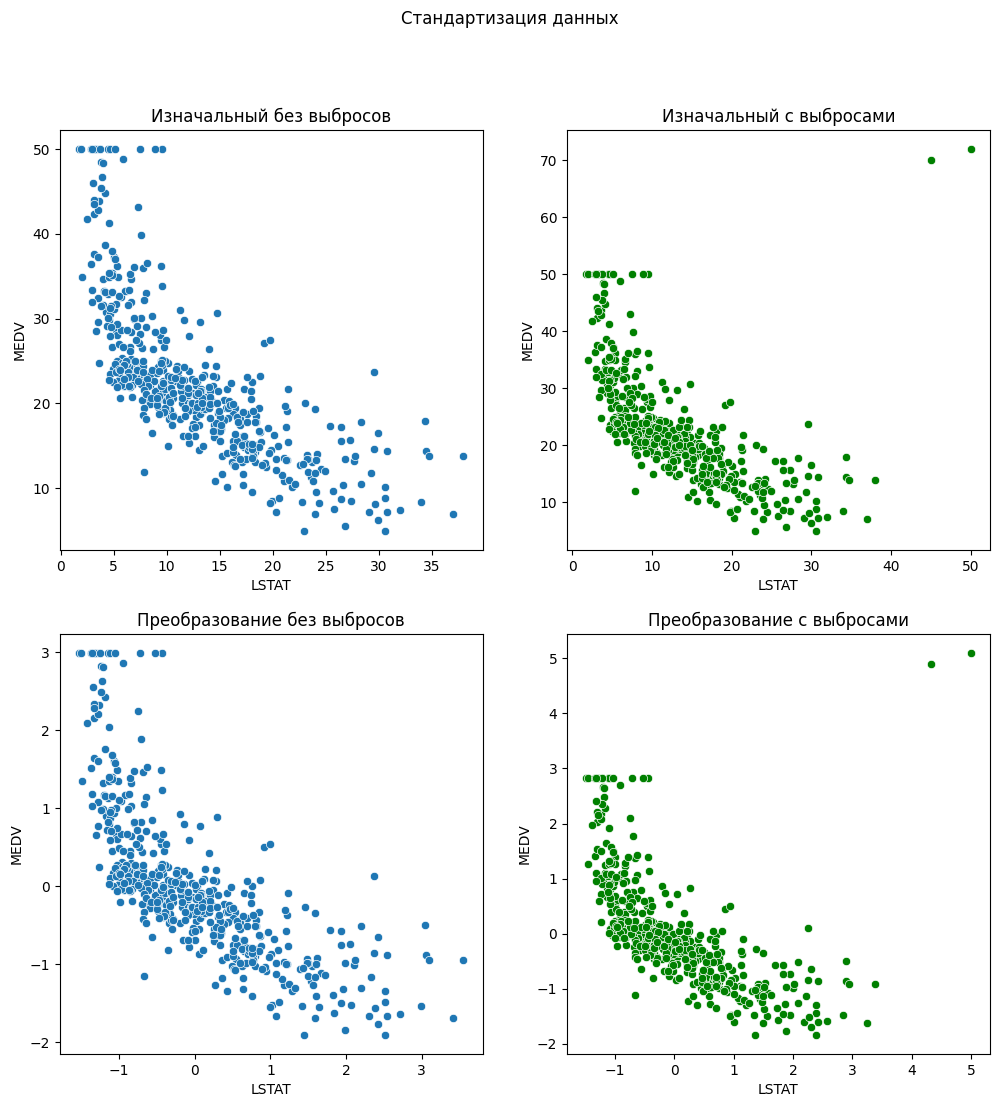

In [18]:
# первая функция будет принимать на вход четыре датафрейма
# и визуализировать изменения с помощью точечной диаграммы

def scatter_plots(df, df_outlier, df_scaled, df_outlier_scaled, title):
	fig, ax = plt.subplots(2, 2, figsize = (12,12))
	sns.scatterplot(data = df, x='LSTAT', y='MEDV', ax = ax[0, 0])
	ax[0, 0].set_title('Изначальный без выбросов')
	sns.scatterplot(data=df_outlier, x='LSTAT', y='MEDV', color='green', ax=ax[0, 1])
	ax[0, 1].set_title('Изначальный с выбросами')
	sns.scatterplot(data=df_scaled,x='LSTAT',y='MEDV',ax=ax[1, 0])
	ax[1, 0].set_title('Преобразование без выбросов')
	sns.scatterplot(data=df_outlier_scaled, x='LSTAT', y='MEDV', color='green', ax=ax[1, 1])
	ax[1, 1].set_title('Преобразование с выбросами')
	plt.suptitle(title)
	plt.show()

scatter_plots(boston, boston_outlier, boston_scaled, boston_outlier_scaled, title = 'Стандартизация данных')

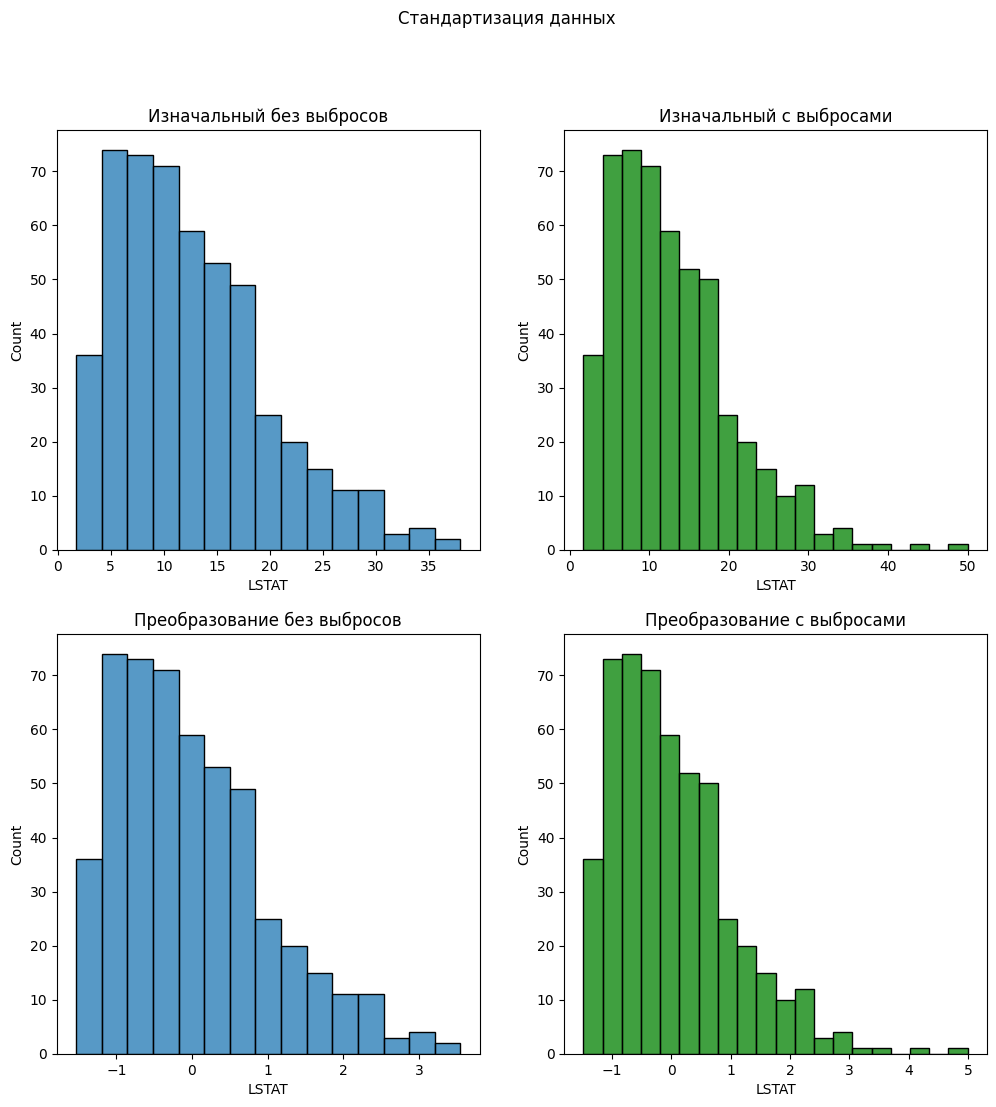

In [19]:
# вторая функция будет визуализировать изменения с помощью гистограммы
def hist_plots(df, df_outlier, df_scaled, df_outlier_scaled, title):
	fig, ax = plt.subplots(2, 2, figsize = (12,12))
	sns.histplot(data = df, x = 'LSTAT', ax = ax[0, 0])
	ax[0, 0].set_title('Изначальный без выбросов')
	sns.histplot(data=df_outlier, x='LSTAT', color='green', ax=ax[0, 1])
	ax[0, 1].set_title('Изначальный с выбросами')
	sns.histplot(data = df_scaled, x = 'LSTAT', ax = ax[1, 0])
	ax[1, 0].set_title('Преобразование без выбросов')
	sns.histplot(data=df_outlier_scaled, x='LSTAT', color='green', ax=ax[1, 1])
	ax[1, 1].set_title('Преобразование с выбросами')
	plt.suptitle(title)
	plt.show()

hist_plots(boston, boston_outlier, boston_scaled, boston_outlier_scaled, title = 'Стандартизация данных')

In [20]:
boston_inverse = pd.DataFrame(st_scaler.inverse_transform(boston_scaled), columns = boston.columns)

In [21]:
# используем метод .equals(), чтобы выяснить, одинаковы ли датафреймы
boston.equals(boston_inverse)

False

In [22]:
# вычтем значения одного датафрейма из значений другого
(boston - boston_inverse).head(3)

,LSTAT,MEDV
0,0.000000e+00,0.0
1,0.000000e+00,0.0
2,-8.881784e-16,0.0


In [24]:
# импортируем данные о недвижимости в Калифорнии
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y = True, as_frame = True)

# убедимся, что данные в нужном нам формате
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [25]:
# посмотрим на признаки
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
# разделим данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [28]:
# импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler
# и создания модели линейной регрессии
from sklearn.linear_model import LinearRegression
# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler

,copy,True
,with_mean,True
,with_std,True


In [30]:
# масштабируем признаки обучающей выборки
X_train_scaled = scaler.fit_transform(X_train)
# убедимся, что объект scaler запомнил значения среднего и СКО для каждого признака
scaler.mean_, scaler.scale_

(array([ 3.87831412e+00,  2.85959948e+01,  5.43559839e+00,  1.09688116e+00,
         1.42749729e+03,  3.10665968e+00,  3.56467196e+01, -1.19583736e+02]),
 array([1.90372658e+00, 1.26109222e+01, 2.42157219e+00, 4.38789636e-01,
        1.14289394e+03, 1.19554480e+01, 2.13388067e+00, 2.00237697e+00]))

In [31]:
model = LinearRegression().fit(X_train_scaled, y_train)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
X_test_scaled = scaler.transform(X_test)
# сделаем прогноз
y_pred = model.predict(X_test_scaled)
y_pred[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

In [33]:
model.score(X_test_scaled, y_test)

0.591050979549135

In [34]:
# импортируем класс make_pipeline (упрощенный вариант класса Pipeline) из модуля pipeline
from sklearn.pipeline import make_pipeline
# создадим объект pipe, в который поместим объекты классов StandardScaler и LinearRegression
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe

,steps,"[('standardscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [35]:
#обучим пайплайн
pipe.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [36]:
#сделаем прогноз
pipe.predict(X_test)

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352], shape=(5160,))

In [37]:
pipe.score(X_test, y_test)

0.591050979549135

In [38]:
make_pipeline(StandardScaler(), LinearRegression()).fit(X_train, y_train).predict(X_test)

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352], shape=(5160,))

In [39]:
make_pipeline(StandardScaler(), LinearRegression()).fit(X_train, y_train).score(X_test, y_test)

0.591050979549135

In [40]:
# импортируем класс Pipeline
from sklearn.pipeline import Pipeline
# задаем названия и создаем объекты используемых классов
pipe = Pipeline(steps = [('scaler', StandardScaler()), ('lr', LinearRegression())], verbose = True)

In [41]:
# рассчитаем коэффициент детерминации
pipe.fit(X_train, y_train).score(X_test, y_test)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s


0.591050979549135

In [43]:
# импортируем класс MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# создаем объект этого класса,
# в параметре feature_range оставим диапазон по умолчанию
minmax = MinMaxScaler(feature_range = (0, 1))
minmax
# применим метод .fit()
minmax.fit(boston)
# найдем минимальные и максимальные значения
minmax.data_min_, minmax.data_max_

(array([1.73, 5.  ]), array([37.97, 50.  ]))

In [45]:
boston_scaled = minmax.transform(boston)
boston_outlier_scaled = minmax.fit_transform(boston_outlier)
boston_scaled = pd.DataFrame(boston_scaled, columns = boston.columns)
boston_outlier_scaled = pd.DataFrame(boston_outlier_scaled, columns = boston.columns)

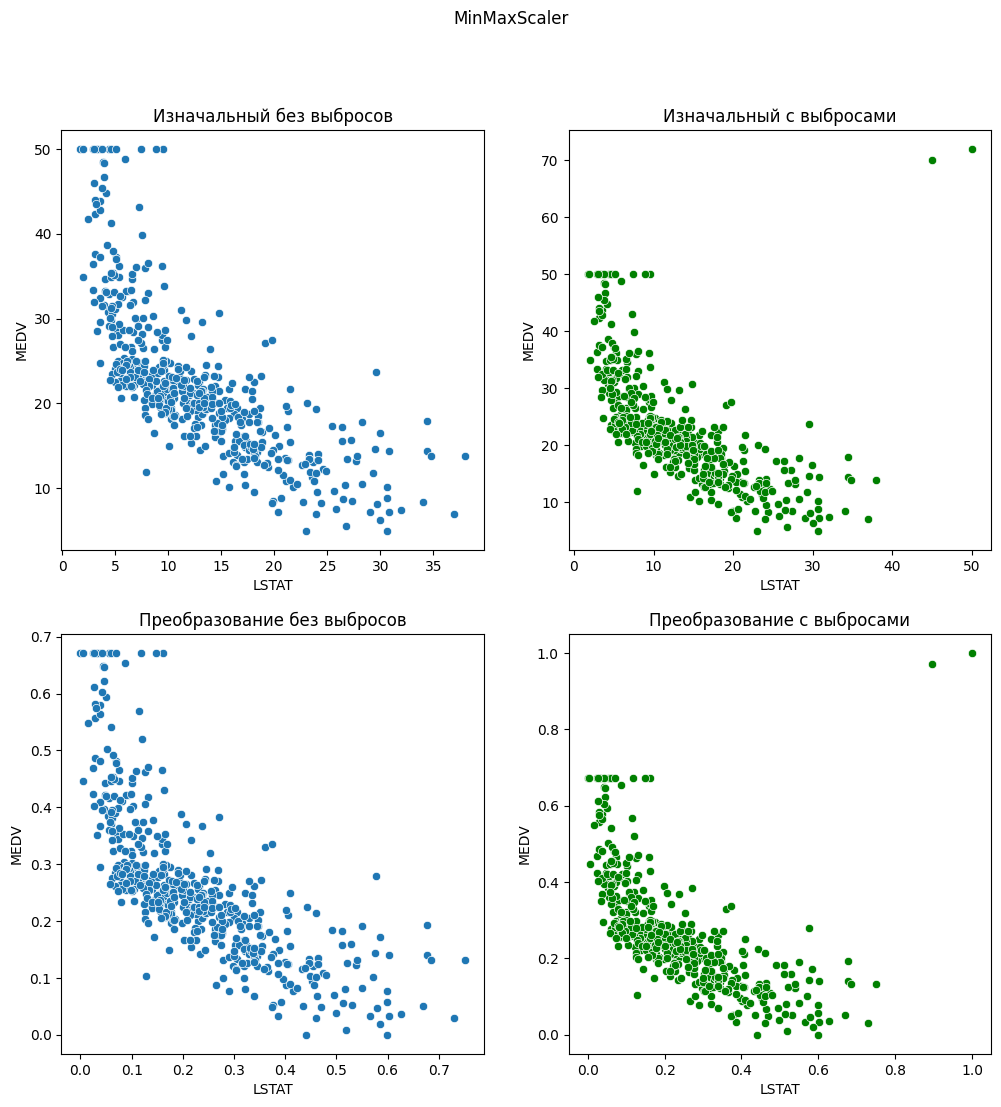

In [46]:
# построим точечные диаграммы
scatter_plots(boston, boston_outlier, boston_scaled, boston_outlier_scaled, title = 'MinMaxScaler')

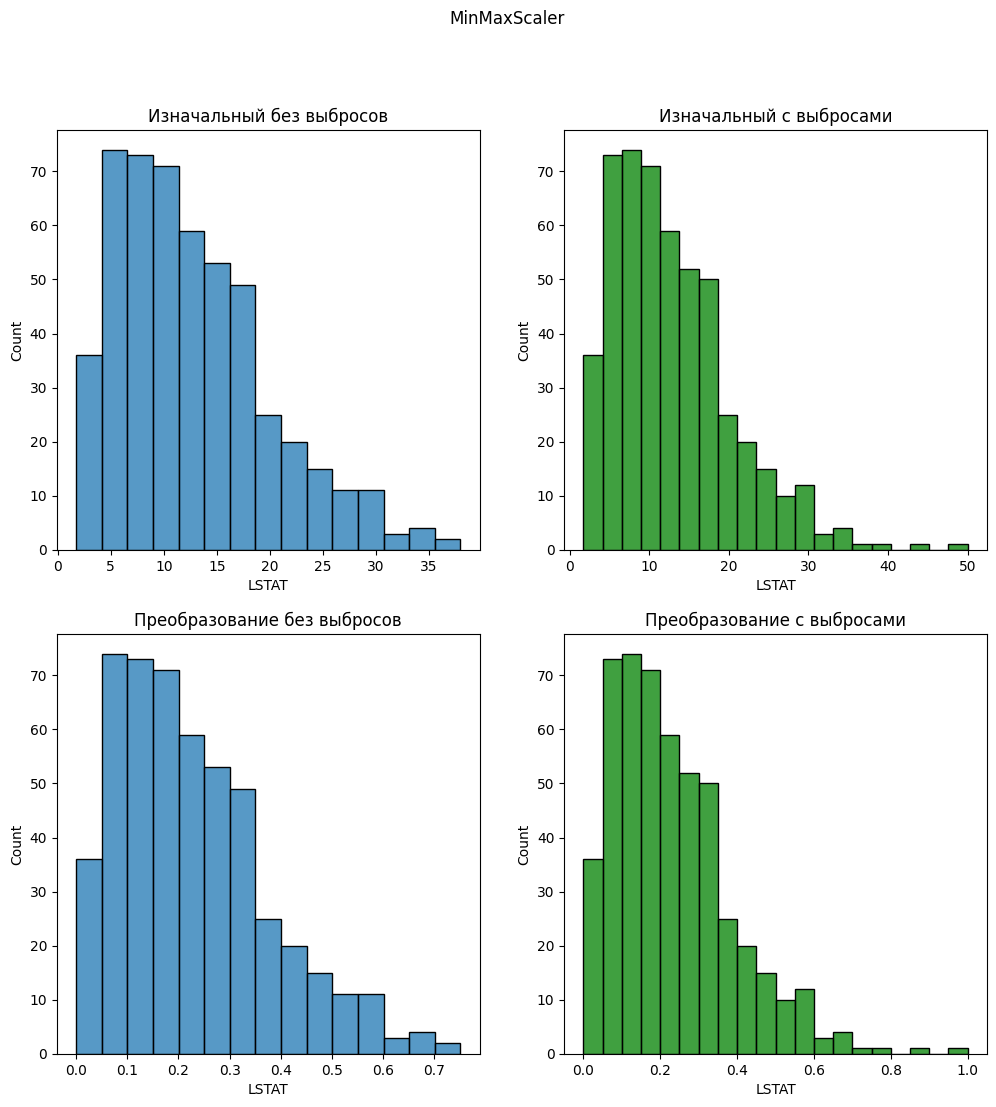

In [47]:
# и гистограммы
hist_plots(boston, boston_outlier, boston_scaled, boston_outlier_scaled, title = 'MinMaxScaler')

In [48]:
# создадим разреженную матрицу с пятью признаками
sparse_data = {}
sparse_data['F1'] = [0, 0, 1.25, 0, 2.15, 0, 0, 0, 0, 0, 0, 0]
sparse_data['F2'] = [0, 0, 0, 0.45, 0,1.20, 0, 0, 0, 1.28, 0, 0]
sparse_data['F3'] = [0, 0, 0, 0, 2.15, 0, 0, 0, 0.33, 0, 0, 0]
sparse_data['F4'] = [0, -6.5, 0, 0, 0, 0, 8.25, 0, 0, 0, 0, 0]
sparse_data['F5'] = [0, 0, 0, 0, 0, 3.17, 0, 0, 0, 0, 0, -1.85]
sparse_data = pd.DataFrame(sparse_data)
sparse_data

,F1,F2,F3,F4,F5
0,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,-6.50,0.00
2,1.25,0.00,0.00,0.00,0.00
3,0.00,0.45,0.00,0.00,0.00
4,2.15,0.00,2.15,0.00,0.00
5,0.00,1.20,0.00,0.00,3.17
6,0.00,0.00,0.00,8.25,0.00
7,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.33,0.00,0.00
9,0.00,1.28,0.00,0.00,0.00


In [49]:
pd.DataFrame(StandardScaler().fit_transform(sparse_data),
columns = sparse_data.columns).round(2)

,F1,F2,F3,F4,F5
0,-0.43,-0.53,-0.35,-0.05,-0.10
1,-0.43,-0.53,-0.35,-2.19,-0.10
2,1.47,-0.53,-0.35,-0.05,-0.10
3,-0.43,0.45,-0.35,-0.05,-0.10
4,2.83,-0.53,3.28,-0.05,-0.10
5,-0.43,2.07,-0.35,-0.05,2.90
6,-0.43,-0.53,-0.35,2.68,-0.10
7,-0.43,-0.53,-0.35,-0.05,-0.10
8,-0.43,-0.53,0.21,-0.05,-0.10
9,-0.43,2.24,-0.35,-0.05,-0.10


In [50]:
# создадим двумерный массив
arr = np.array([[ 1., -1., -2.],
[ 2., 0., 0.],
[ 0., 1., 1.]])
# применим MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
maxabs = MaxAbsScaler()
maxabs.fit_transform(arr)

array([[ 0.5, -1. , -1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0.5]])

In [51]:
maxabs.scale_

array([2., 1., 2.])

In [52]:
pd.DataFrame(MaxAbsScaler().fit_transform(sparse_data), columns = sparse_data.columns).round(2)

,F1,F2,F3,F4,F5
0,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,-0.79,0.00
2,0.58,0.00,0.00,0.00,0.00
3,0.00,0.35,0.00,0.00,0.00
4,1.00,0.00,1.00,0.00,0.00
5,0.00,0.94,0.00,0.00,1.00
6,0.00,0.00,0.00,1.00,0.00
7,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.15,0.00,0.00
9,0.00,1.00,0.00,0.00,0.00


In [53]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(sparse_data.values)
print(csr_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11 stored elements and shape (12, 5)>
  Coords	Values
  (1, 3)	-6.5
  (2, 0)	1.25
  (3, 1)	0.45
  (4, 0)	2.15
  (4, 2)	2.15
  (5, 1)	1.2
  (5, 4)	3.17
  (6, 3)	8.25
  (8, 2)	0.33
  (9, 1)	1.28
  (11, 4)	-1.85


In [54]:
csr_data_scaled = MaxAbsScaler().fit_transform(csr_data)
print(csr_data_scaled)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11 stored elements and shape (12, 5)>
  Coords	Values
  (1, 3)	-0.7878787878787878
  (2, 0)	0.5813953488372093
  (3, 1)	0.3515625
  (4, 0)	1.0
  (4, 2)	1.0
  (5, 1)	0.9375
  (5, 4)	0.9999999999999999
  (6, 3)	1.0
  (8, 2)	0.15348837209302327
  (9, 1)	1.0
  (11, 4)	-0.583596214511041


In [55]:
csr_data_scaled.todense().round(2)

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , -0.79,  0.  ],
       [ 0.58,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.35,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.94,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.15,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.58]])

In [56]:
from sklearn.preprocessing import RobustScaler
boston_scaled = RobustScaler().fit_transform(boston)
boston_outlier_scaled = RobustScaler().fit_transform(boston_outlier)
boston_scaled = pd.DataFrame(boston_scaled, columns = boston.columns)
boston_outlier_scaled = pd.DataFrame(boston_outlier_scaled, columns = boston.columns)

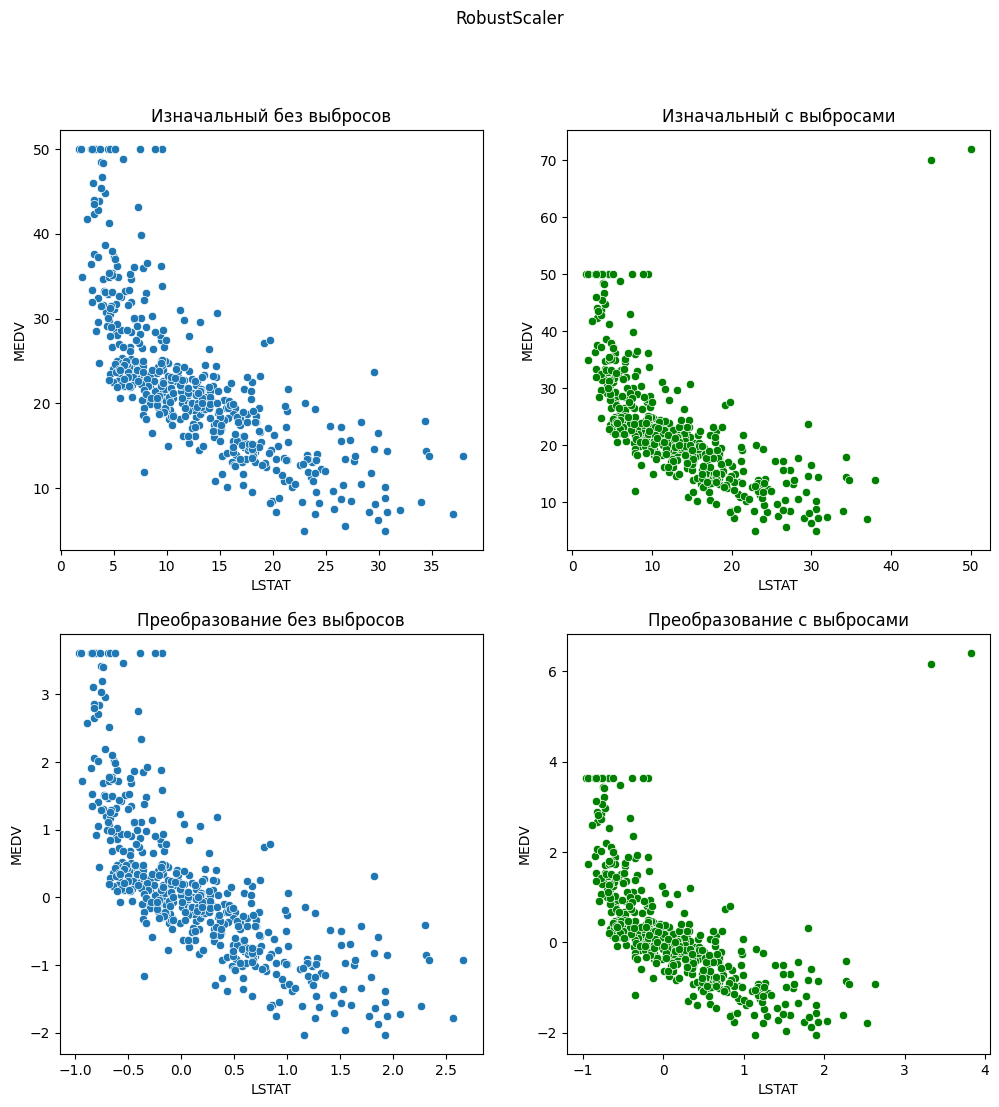

In [57]:
scatter_plots(boston,
boston_outlier,
boston_scaled,
boston_outlier_scaled,
title = 'RobustScaler')

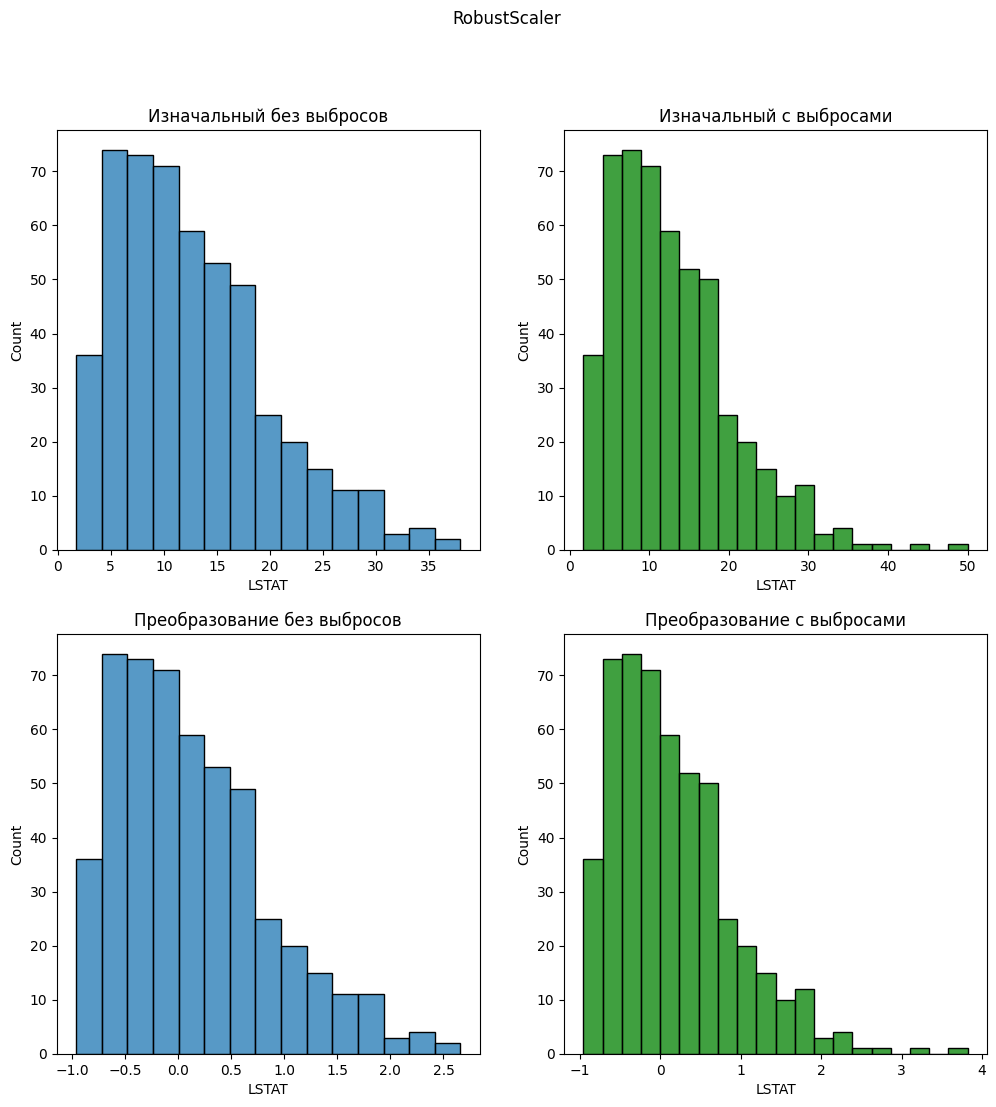

In [58]:
hist_plots(boston,
boston_outlier,
boston_scaled,
boston_outlier_scaled,
title = 'RobustScaler')

In [59]:
v = np.array([4, 3])
l2norm = np.sqrt(v[0]**2 + v[1]**2)
l2norm

np.float64(5.0)

In [60]:
v_normalized = v/l2norm
v_normalized

array([0.8, 0.6])

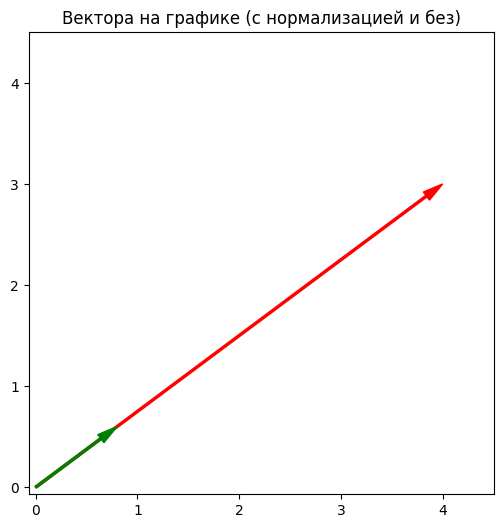

In [62]:
plt.figure(figsize = (6, 6))
ax = plt.axes()
plt.xlim([-0.07, 4.5])
plt.ylim([-0.07, 4.5])
ax.arrow(0, 0, v[0], v[1], width = 0.02, head_width = 0.1, head_length = 0.2, length_includes_head = True, fc = 'r', ec = 'r')
ax.arrow(0, 0, v_normalized[0], v_normalized[1], width = 0.02, head_width = 0.1, head_length = 0.2, length_includes_head = True, fc = 'g', ec = 'g')
plt.title('Вектора на графике (с нормализацией и без)')
plt.show()

In [63]:
# каждая строка - это вектор
arr = np.array([[45, 30],
[12, -340],
[-125, 4]])
# найдем L2 норму первого вектора
np.sqrt(arr[0][0] ** 2 + arr[0][1] ** 2)

np.float64(54.08326913195984)

In [64]:
# в цикле пройдемся по строкам
for row in arr:
	# найдем L2 норму каждого вектора-строки
	l2norm = np.sqrt(row[0] ** 2 + row[1] ** 2)
	# и разделим на нее каждый из компонентов вектора
	print((row[0]/l2norm).round(8), (row[1]/l2norm).round(8))
	# убедимся, что L2 нормализация выполнена верно,
	# подставив в формулу Евклидова расстояния новые координаты
	np.sqrt(0.83205029 ** 2 + 0.5547002 ** 2).round(3)

# выполним ту же операцию с помощью класса Normalizer
from sklearn.preprocessing import Normalizer
Normalizer().fit_transform(arr)

0.83205029 0.5547002
0.03527216 -0.99937774
-0.99948839 0.03198363


array([[ 0.83205029,  0.5547002 ],
       [ 0.03527216, -0.99937774],
       [-0.99948839,  0.03198363]])

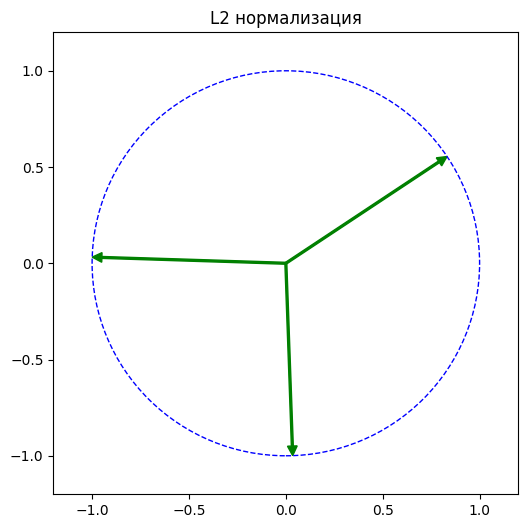

In [65]:
plt.figure(figsize = (6, 6))
ax = plt.axes()
# в цикле нормализуем каждый из векторов
for v in Normalizer().fit_transform(arr):
# и выведем его на графике в виде стрелки
	ax.arrow(0, 0, v[0], v[1], width = 0.01, head_width = 0.05, head_length = 0.05, length_includes_head = True, fc = 'g', ec = 'g')
# добавим единичную окружность
circ = plt.Circle((0, 0), radius = 1, edgecolor = 'b',
facecolor = 'None', linestyle = '--')
ax.add_patch(circ)
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.title('L2 нормализация')
plt.show()

In [66]:
# данные о росте, весе и возрасте людей
people = np.array([[180, 80, 50],
[170, 73, 50]])

In [67]:
Normalizer().fit_transform(people)

array([[0.8857221 , 0.39365427, 0.24603392],
       [0.88704238, 0.38090643, 0.26089482]])

In [68]:
np.abs(arr[0][0]) + np.abs(arr[0][1])
for row in arr:
	l1norm = np.abs(row[0]) + np.abs(row[1])
	print((row[0]/l1norm).round(8), (row[1]/l1norm).round(8))

0.6 0.4
0.03409091 -0.96590909
-0.96899225 0.03100775


In [69]:
np.abs(0.03409091) + np.abs(-0.96590909)

np.float64(1.0)

In [70]:
# через параметр norm = 'l1' укажем,
# что хотим провести L1 нормализацию
Normalizer(norm = 'l1').fit_transform(arr)

array([[ 0.6       ,  0.4       ],
       [ 0.03409091, -0.96590909],
       [-0.96899225,  0.03100775]])

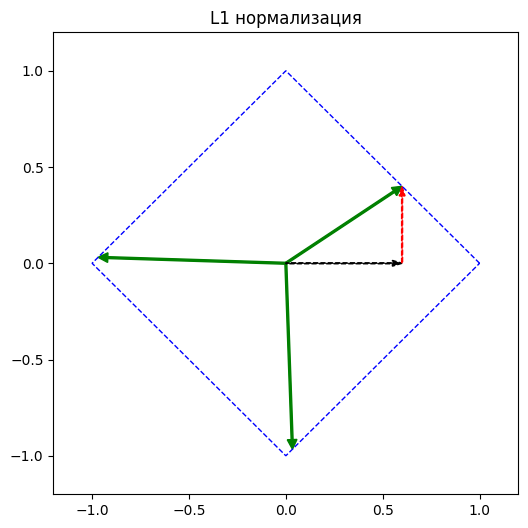

In [71]:
plt.figure(figsize = (6, 6))
ax = plt.axes()

# выведем L1 нормализованные векторы
for v in Normalizer(norm = 'l1').fit_transform(arr):
	ax.arrow(0, 0, v[0], v[1], width = 0.01, head_width = 0.05, head_length = 0.05, length_includes_head = True, fc = 'g', ec = 'g')

# то, как рассчитывалось расстояние до первого вектора
ax.arrow(0, 0, 0.6, 0, width = 0.005, head_width = 0.03, head_length = 0.05, length_includes_head = True, fc = 'k', ec = 'k', linestyle = '--')
ax.arrow(0.6, 0, 0, 0.4, width = 0.005, head_width = 0.03, head_length = 0.05, length_includes_head = True, fc = 'r', ec = 'r', linestyle = '--')

# а также границы единичных векторов при L1 нормализации
points = [[1, 0], [0, 1], [-1, 0], [0, -1]]
polygon= plt.Polygon(points, fill = None , edgecolor = 'b', linestyle = '--')
ax.add_patch(polygon)

plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.title('L1 нормализация')
plt.show()

In [72]:
#найдем расстояние Чебышёва для первого вектора
max(np.abs(arr[0][0]), np.abs(arr[0][1]))
#теперь для всего массива
for row in arr:
	#найдем соответствующую норму Чебышёва
	l_inf = max(np.abs(row[0]), np.abs(row[1]))
	#и нормализуем векторы
	print((row[0]/l_inf).round(8), (row[1]/l_inf).round(8))

1.0 0.66666667
0.03529412 -1.0
-1.0 0.032


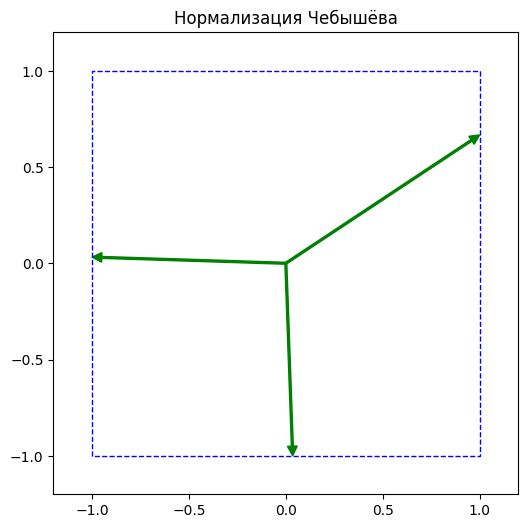

In [74]:
plt.figure(figsize = (6, 6))
ax = plt.axes()
# выведем нормализованные по расстоянию Чебышёва векторы
for v in Normalizer(norm = 'max').fit_transform(arr):
	ax.arrow(0, 0, v[0], v[1], width = 0.01, head_width = 0.05, head_length = 0.05, length_includes_head = True, fc = 'g', ec = 'g')

# а также границы единичных векторов при такой нормализации
points = [[1, 1], [1, -1], [-1, -1], [-1, 1]]
polygon= plt.Polygon(points, fill = None , edgecolor = 'b',
linestyle = '--')
ax.add_patch(polygon)
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.title('Нормализация Чебышёва')
plt.show()

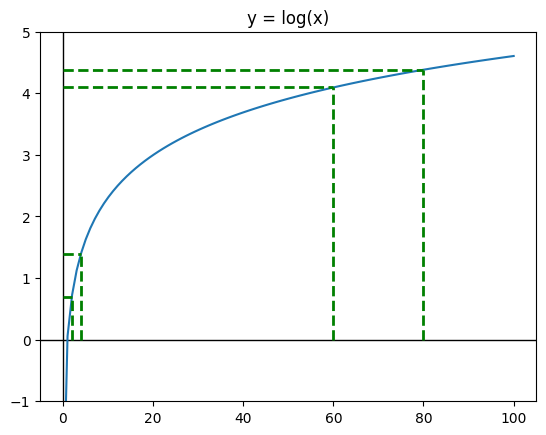

In [76]:
#вновь подгрузим полный датасет boston
boston = pd.read_csv('files/boston.csv')

#построим график логарифмической функции
x = np.linspace(0.05, 100, 100)
y = np.log(x)
ax = plt.axes()
plt.xlim([-5, 105])
plt.ylim([-1, 5])
ax.hlines(y = 0, xmin = -5, xmax = 105, linewidth = 1, color = 'k')
ax.vlines(x = 0, ymin = -1, ymax = 5, linewidth = 1, color = 'k')
plt.plot(x,y)
#возьмем произвольные промежутки между малыми
ax.vlines(x = 2, ymin = 0, ymax = np.log(2), linewidth = 2, color = 'g', linestyles = '--')
ax.vlines(x = 4, ymin = 0, ymax = np.log(4), linewidth = 2, color = 'g', linestyles = '--')
ax.hlines(y = np.log(2), xmin = 0, xmax = 2, linewidth = 2, color = 'g', linestyles = '--')
ax.hlines(y = np.log(4), xmin = 0, xmax = 4, linewidth = 2, color = 'g', linestyles = '--')
#и большими значениями
ax.vlines(x = 60, ymin = 0, ymax = np.log(60), linewidth = 2, color = 'g', linestyles = '--')
ax.vlines(x = 80, ymin = 0, ymax = np.log(80), linewidth = 2, color = 'g', linestyles = '--')
ax.hlines(y = np.log(60), xmin = 0, xmax = 60, linewidth = 2, color = 'g', linestyles = '--')
ax.hlines(y = np.log(80), xmin = 0, xmax = 80, linewidth = 2, color = 'g', linestyles = '--')
plt.title('y = log(x)')
plt.show()

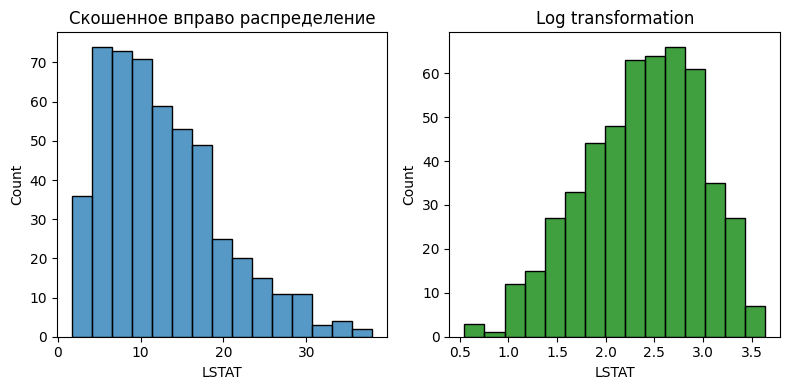

In [77]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sns.histplot(x = boston.LSTAT, bins = 15, ax = ax[0])
ax[0].set_title('Скошенное вправо распределение')
sns.histplot(x = np.log(boston.LSTAT), bins = 15, color = 'green', ax = ax[1])
ax[1].set_title('Log transformation')
plt.tight_layout()
plt.show()

In [79]:
from scipy.stats import skew, kurtosis
skew(boston.LSTAT), skew(np.log(boston.LSTAT))

(np.float64(0.9037707431346133), np.float64(-0.3192822699479382))

In [80]:
kurtosis(boston.LSTAT), kurtosis(np.log(boston.LSTAT))

(np.float64(0.476544755729746), np.float64(-0.4390590293275558))

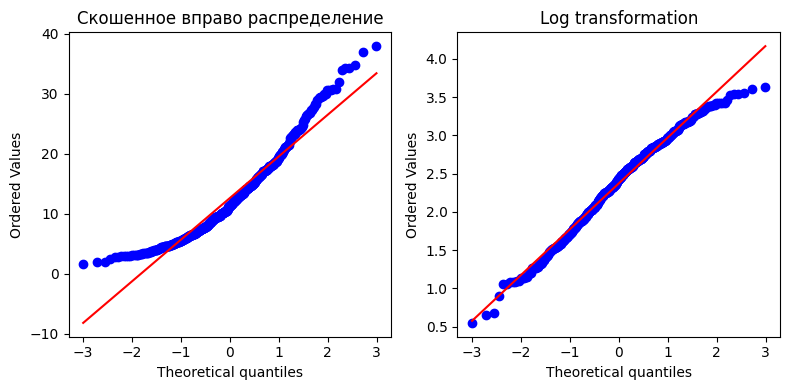

In [81]:
# построим графики нормальной вероятности
from scipy.stats import probplot
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
probplot(boston.LSTAT, dist = 'norm', plot = ax[0])
ax[0].set_title('Скошенное вправо распределение')
probplot(np.log(boston.LSTAT), dist = 'norm', plot = ax[1])
ax[1].set_title('Log transformation')
plt.tight_layout()
plt.show()

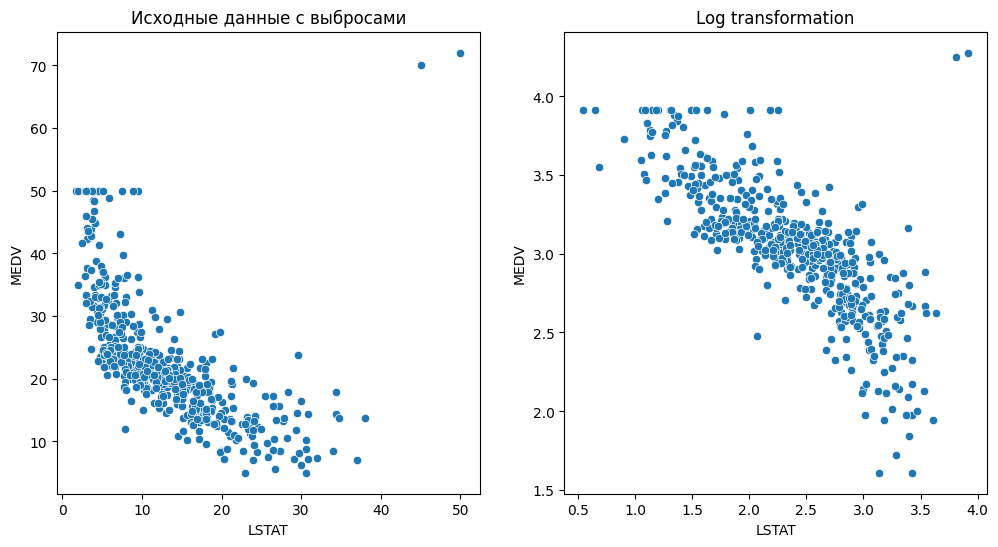

In [82]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
sns.scatterplot(x = boston_outlier.LSTAT, y =
boston_outlier.MEDV, ax = ax[0]).set(title = 'Исходные данные с выбросами')
sns.scatterplot(x = np.log(boston_outlier.LSTAT), y =
np.log(boston_outlier.MEDV), ax = ax[1]).set(title = 'Log transformation');

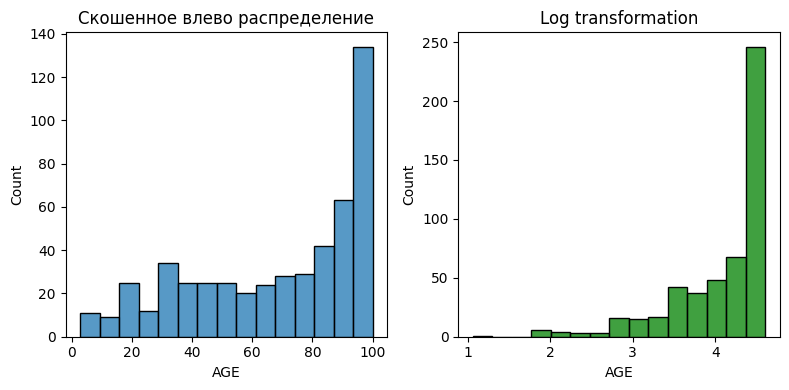

In [83]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sns.histplot(x = boston.AGE, bins = 15, ax = ax[0])
ax[0].set_title('Скошенное влево распределение')
sns.histplot(x = np.log(boston.AGE), bins = 15, color = 'green', ax = ax[1])
ax[1].set_title('Log transformation')
plt.tight_layout()
plt.show()

In [84]:
skew(boston.AGE), skew(np.log(boston.AGE))

(np.float64(-0.5971855948016143), np.float64(-1.6706835909283215))

In [85]:
kurtosis(boston.AGE), kurtosis(np.log(boston.AGE))

(np.float64(-0.97001392664039), np.float64(2.907332087827127))

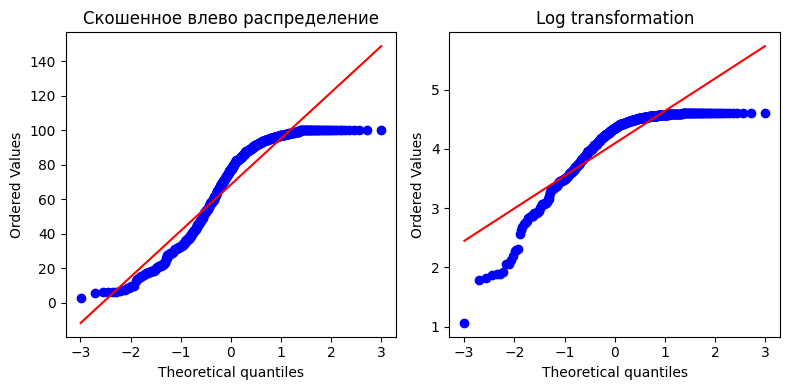

In [86]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
probplot(boston.AGE, dist = 'norm', plot = ax[0])
ax[0].set_title('Скошенное влево распределение')
probplot(np.log(boston.AGE), dist = 'norm', plot = ax[1])
ax[1].set_title('Log transformation')
plt.tight_layout()
plt.show()

In [87]:
np.log(boston.ZN + 0.0001)[:5]

0    2.890377
1   -9.210340
2   -9.210340
3   -9.210340
4   -9.210340
Name: ZN, dtype: float64

In [88]:
np.log(boston.ZN + np.sqrt(boston.ZN ** 2 + 1))[:5]

0    3.58429
1    0.00000
2    0.00000
3    0.00000
4    0.00000
Name: ZN, dtype: float64

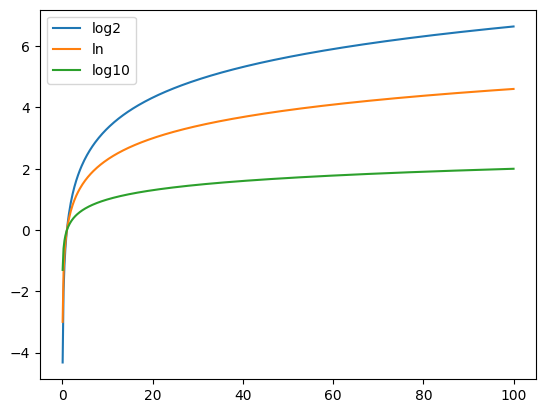

In [89]:
x = np.linspace(0.05, 100, 500)
y_2 = np.log2(x)
y_ln = np.log(x)
y_10 = np.log10(x)
plt.plot(x, y_2, label = 'log2')
plt.plot(x, y_ln, label = 'ln')
plt.plot(x, y_10, label = 'log10')
plt.legend()
plt.show()

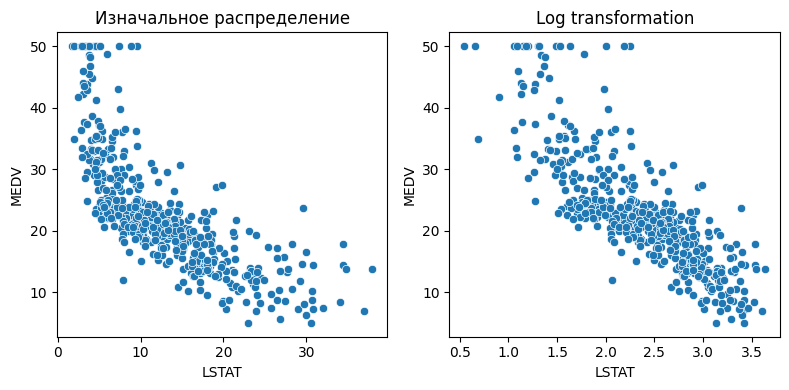

In [90]:
# визуально оценим "выпрямление" данных
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sns.scatterplot(x = boston.LSTAT, y = boston.MEDV, ax =
ax[0])
ax[0].set_title('Изначальное распределение')
sns.scatterplot(x = np.log(boston.LSTAT), y = boston.MEDV, ax
= ax[1])
ax[1].set_title('Log transformation')
plt.tight_layout()
plt.show()

In [91]:
boston['LSTAT_log'] = np.log(boston['LSTAT'])
boston['MEDV_log'] = np.log(boston['MEDV'])
boston[['LSTAT', 'LSTAT_log', 'MEDV', 'MEDV_log']].corr()

,LSTAT,LSTAT_log,MEDV,MEDV_log
LSTAT,1.000000,0.944031,-0.737663,-0.805034
LSTAT_log,0.944031,1.000000,-0.815442,-0.822960
MEDV,-0.737663,-0.815442,1.000000,0.953155
MEDV_log,-0.805034,-0.822960,0.953155,1.000000


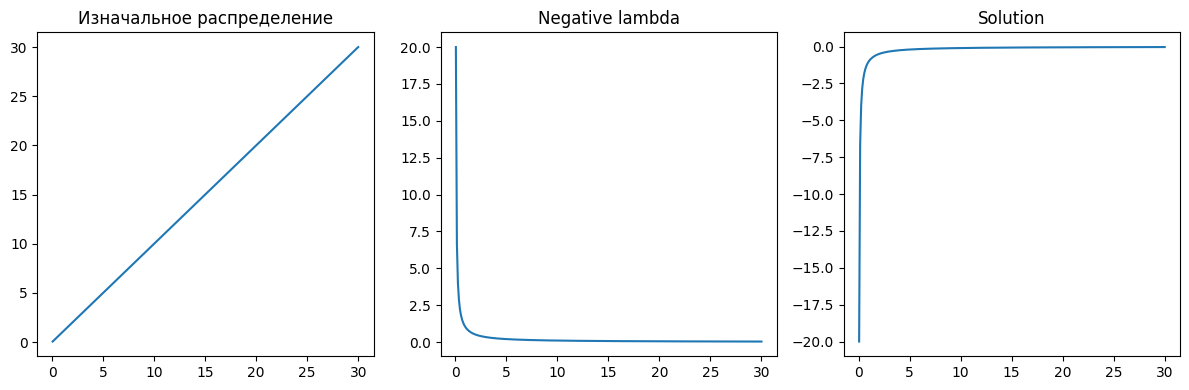

In [92]:
x = np.linspace(0.05, 30, 300)
y0 = x
y1 = x ** (-1)
y2 = -(x ** (-1))
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))
ax[0].plot(x, y0);
ax[0].set_title('Изначальное распределение')
ax[1].plot(x, y1);
ax[1].set_title('Negative lambda')
ax[2].plot(x, y2);
ax[2].set_title('Solution')
plt.tight_layout()
plt.show()

In [93]:
def tukey(x, y):
	x, y = x.to_numpy(), y.to_numpy()
	# в lambdas поместим возможные степени
	lambdas = [-2, -1, -1/2, 0, 1/2, 1, 2]
	# в corrs будем записывать получающиеся корреляции
	corrs = []
	# в цикле последовательно применим каждую lambda
	for l in lambdas:
		if l < 0:
		# рассчитаем коэффициент корреляции Пирсона и добавим результат в corrs
			corrs.append(np.corrcoef(x ** l, y ** l)[0][1])
		elif l == 0:
			corrs.append(np.corrcoef(np.log(x + np.sqrt(x**2 + 1)),
			np.log(y+np.sqrt(y**2+1)))[0][1])
		else:
			corrs.append(np.corrcoef(-(x ** l), -(y ** l))[0][1])
	# теперь найдем индекс наибольшего значения корреляции
	idx = np.argmax(np.abs(corrs))
	# выведем оптимальную lambda и соответствующую корреляцию
	return lambdas[idx], np.round(corrs[idx], 3)

tukey(boston.LSTAT, boston.MEDV)

(0, np.float64(-0.824))

In [94]:
for col in boston[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]:
	print(str(col) + '\t' + str(tukey(boston[col], boston.MEDV)))

CRIM	(0, np.float64(-0.593))
NOX	(-0.5, np.float64(-0.526))
RM	(2, np.float64(0.724))
AGE	(0.5, np.float64(-0.402))
DIS	(-1, np.float64(0.489))
RAD	(0, np.float64(-0.44))
TAX	(-0.5, np.float64(-0.558))
PTRATIO	(0.5, np.float64(-0.509))
LSTAT	(0, np.float64(-0.824))


In [95]:
boston[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']].corr().MEDV.round(2)

CRIM      -0.39
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [96]:
boston_transformed = {}
boston_transformed['RM'] = boston.RM ** 2
boston_transformed['PTRATIO'] = np.sqrt(boston.PTRATIO)
boston_transformed['LSTAT'] = np.log(boston.LSTAT)
boston_transformed['MEDV'] = boston.MEDV
boston_transformed = pd.DataFrame(boston_transformed, columns = ['RM', 'PTRATIO', 'LSTAT', 'MEDV'])
boston_transformed.head()

,RM,PTRATIO,LSTAT,MEDV
0,43.230625,3.911521,1.605430,24.0
1,41.229241,4.219005,2.212660,21.6
2,51.624225,4.219005,1.393766,34.7
3,48.972004,4.324350,1.078410,33.4
4,51.079609,4.324350,1.673351,36.2


In [97]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(boston[['RM', 'PTRATIO', 'LSTAT']], boston.MEDV)
model.score(boston[['RM', 'PTRATIO', 'LSTAT']], boston.MEDV)

0.6786241601613111

In [98]:
model = LinearRegression()
model.fit(boston_transformed[['RM', 'PTRATIO', 'LSTAT']],
boston_transformed.MEDV)
model.score(boston_transformed[['RM', 'PTRATIO', 'LSTAT']],
boston_transformed.MEDV)

0.7446785206677596

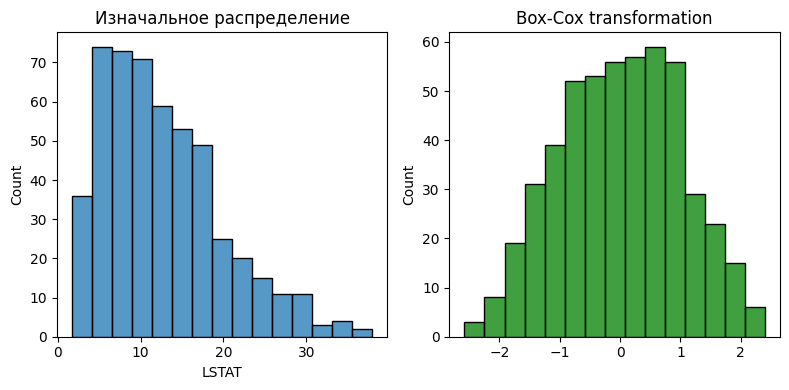

In [100]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'box-cox')
pt.fit(boston[['LSTAT']])
pt.lambdas_
bc_pt = pt.transform(boston[['LSTAT']])
bc_pt.shape
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sns.histplot(x = boston.LSTAT, bins = 15, ax = ax[0])
ax[0].set_title('Изначальное распределение')
sns.histplot(x = bc_pt.flatten(),
bins = 15, color = 'green',
ax = ax[1])
ax[1].set_title('Box-Cox transformation')
plt.tight_layout()
plt.show()

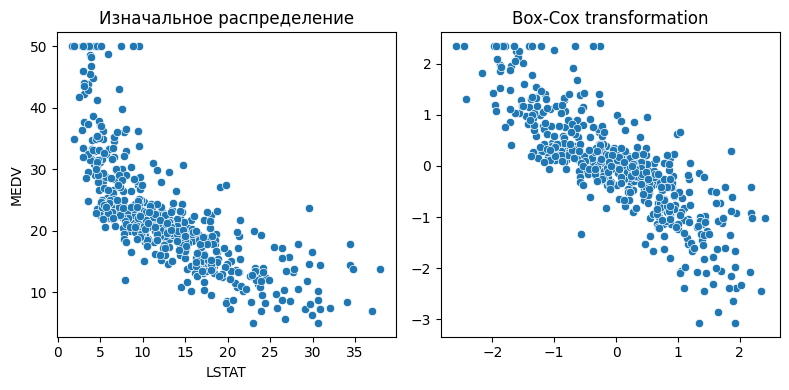

In [101]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sns.scatterplot(x = boston.LSTAT, y = boston.MEDV, ax = ax[0])
ax[0].set_title('Изначальное распределение')
# можно использовать функцию power_transform(),
# она действует аналогично классу, но без estimator
sns.scatterplot(x = power_transform(boston[['LSTAT']], method = 'box-cox').flatten(), y = power_transform(boston[['MEDV']], method = 'box-cox').flatten(), ax = ax[1])
ax[1].set_title('Box-Cox transformation')
plt.tight_layout()
plt.show()

In [102]:
pd.DataFrame(power_transform(boston[['LSTAT', 'MEDV']], method = 'box-cox'), columns = [['LSTAT', 'MEDV']]).corr()

,LSTAT,MEDV
LSTAT,1.000000,-0.830424
MEDV,-0.830424,1.000000


In [103]:
MEDV_bc = power_transform(boston[['MEDV']], method='box-cox').flatten()

for col in boston[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]:
	col_bc = power_transform(boston[[col]], method = 'box-cox').flatten()
	print(col+'\t'+str(np.round(np.corrcoef(col_bc, MEDV_bc)[0][1], 3)))

CRIM	-0.528
NOX	-0.5
RM	0.64
AGE	-0.452
DIS	0.392
RAD	-0.403
TAX	-0.538
PTRATIO	-0.522
LSTAT	-0.83


In [104]:
pt = PowerTransformer(method = 'box-cox')
boston_bc = pt.fit_transform(boston[['RM', 'PTRATIO', 'LSTAT', 'MEDV']])
boston_bc = pd.DataFrame(boston_bc, columns = ['RM', 'PTRATIO', 'LSTAT', 'MEDV'])

In [105]:
model = LinearRegression()
model.fit(boston_bc[['RM', 'PTRATIO', 'LSTAT']], boston_bc.MEDV)
model.score(boston_bc[['RM', 'PTRATIO', 'LSTAT']], boston_bc.MEDV)

0.7331845210304999

In [106]:
pt.lambdas_

array([0.44895975, 4.35021552, 0.22776736, 0.2166209 ])

In [107]:
pd.DataFrame(pt.inverse_transform(boston_bc), columns = ['RM', 'PTRATIO', 'LSTAT', 'MEDV']).head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


## Самостоятельная

Оптимальное λ: 0.50


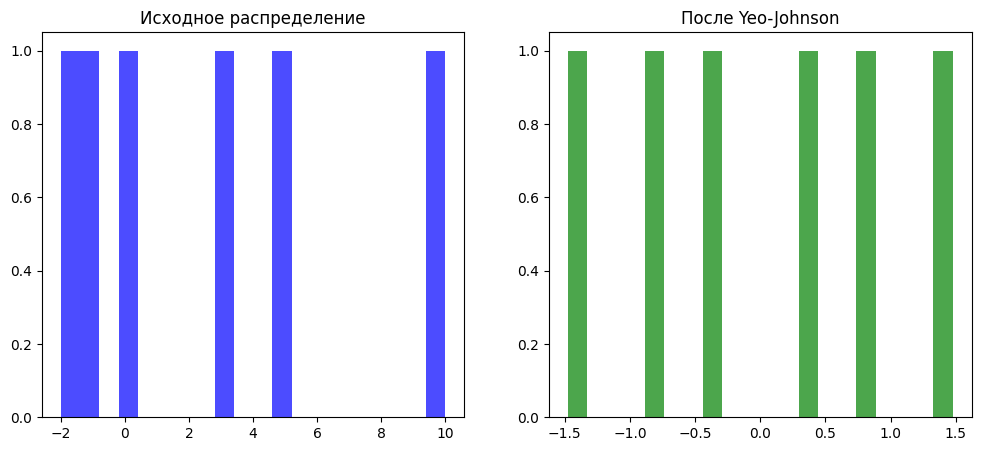

In [2]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import pandas as pd

# Пример данных с нулями и отрицательными значениями
data = pd.DataFrame({'feature': [0, -1, 5, 10, -2, 3]})

# Применение Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(data[['feature']])

# Оптимальное λ
lambda_opt = pt.lambdas_[0]
print(f"Оптимальное λ: {lambda_opt:.2f}")

# Визуализация
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['feature'], bins=20, color='blue', alpha=0.7)
plt.title('Исходное распределение')
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=20, color='green', alpha=0.7)
plt.title('После Yeo-Johnson')
plt.show()

e:\HomeWork\TANN-notebooks\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (502). n_quantiles is set to n_samples.
  warnings.warn(


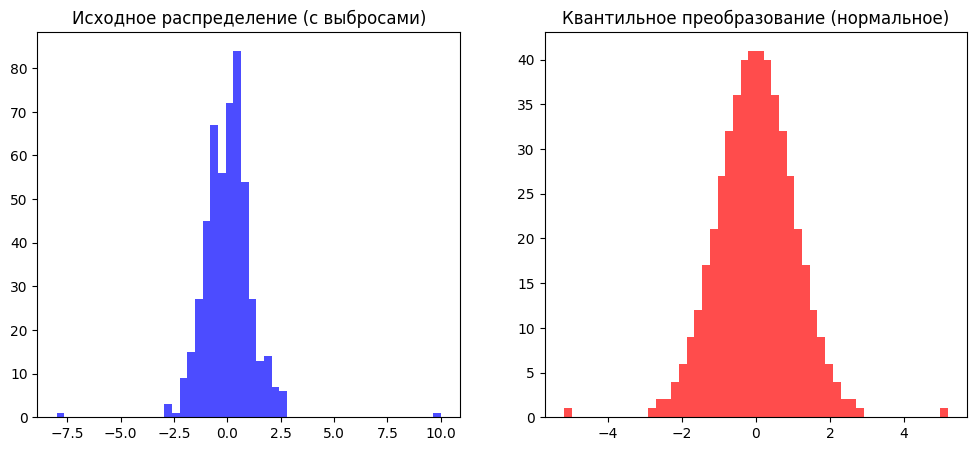

In [3]:
from sklearn.preprocessing import QuantileTransformer

# Пример данных с выбросами
data = pd.DataFrame({'feature': np.concatenate([np.random.normal(0, 1, 500), np.array([10, -8])])})

# Применение квантильного преобразования к нормальному распределению
qt = QuantileTransformer(output_distribution='normal')
transformed_data = qt.fit_transform(data[['feature']])

# Визуализация
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['feature'], bins=50, color='blue', alpha=0.7)
plt.title('Исходное распределение (с выбросами)')
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=50, color='red', alpha=0.7)
plt.title('Квантильное преобразование (нормальное)')
plt.show()